<h1>For this exercise, you've been provided with a csv file, gdp_le.csv, which contains the gdp per capita and life expectancy values that you were working with on the UN data exercise.</h1>
<h3>
1. Start by fitting a linear regression model with target being life expectancy and predictor variable yea 
<br>
    a. What coefficients do you get? Interpret the meaning of these coefficents.  .  


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from patsy.builtins import *
import statsmodels.stats.api as sms

In [3]:
gdp_le = pd.read_csv('../un-linear-regression-GetGubbz/data/gdp_le.csv')

In [4]:
gdp_le.head()

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
1,Afghanistan,2020,1968.341002,Asia,62.575
2,Afghanistan,2019,2079.921861,Asia,63.565
3,Afghanistan,2018,2060.698973,Asia,63.081
4,Afghanistan,2017,2096.093111,Asia,63.016


In [5]:
le_vs_year = smf.ols("Life_Expectancy ~ Year", data=gdp_le).fit()

In [6]:
le_vs_year.params

Intercept   -468.138140
Year           0.267722
dtype: float64

<hr>
<h3>b. Using just the year makes the intercept term difficult to interpret. Create a new model, but this time use years since 1990 as your predictor variable. 
    <br>
    <br>
    Hint: You can the [patsy identity function](https://patsy.readthedocs.io/en/latest/builtins-reference.html#patsy.builtins.I) to modify your predictors in your model formula. Inspect the new coefficients and interpret the meaning of them. Are they statistically significant?</h3>

In [8]:
le_vs_year_no_1990 = smf.ols("Life_Expectancy ~ I(Year > 1990)", data=gdp_le).fit()

In [9]:
le_vs_year_no_1990.params

Intercept                 64.745253
I(Year > 1990)[T.True]     4.381894
dtype: float64

The new coefficient suggests a higher rate of life expectancy after the year 1990

In [11]:
le_vs_year_no_1990.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     31.12
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           2.54e-08
Time:                        22:29:12   Log-Likelihood:                -20139.
No. Observations:                5504   AIC:                         4.028e+04
Df Residuals:                    5502   BIC:                         4.029e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 64.7453      0.775     83.556      0.000      63.226      66.264
I(Year > 1990)[T.True]     4.3819      0.785      5.579      0.000       2.842       5.922
==============================================================================
Omnibus:                      441.762   Durbin-Watson:                   0.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              555.020
Skew:                          -0.776   Prob(JB):                    3.01e-121
Kurtosis:                       3.119   Cond. No.                         12.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-value for this model is 0, which is less than a normal significance value 0.05, so the coefficients are statistically significant

<hr>
<h3>c. Compare the actual mean life expectancy per year to the model's estimate. How well does it do?  

In [14]:
av_le_per_year = gdp_le.groupby('Year')['Life_Expectancy'].mean().reset_index()
av_le_per_year

,Year,Life_Expectancy
0,1990,64.745253
1,1991,65.021276
2,1992,65.217845
3,1993,65.218031
4,1994,65.339539
5,1995,65.956224
6,1996,66.200189
7,1997,66.437280
8,1998,66.556082
9,1999,66.916176


In [15]:
pred_df = pd.DataFrame({'Year': np.linspace(start=gdp_le['Year'].min(), stop=gdp_le['Year'].max())})
pred_df['mean_estimate'] = le_vs_year_no_1990.predict(pred_df)
pred_df

,Year,mean_estimate
0,1990.000000,64.745253
1,1990.653061,69.127146
2,1991.306122,69.127146
3,1991.959184,69.127146
4,1992.612245,69.127146
5,1993.265306,69.127146
6,1993.918367,69.127146
7,1994.571429,69.127146
8,1995.224490,69.127146
9,1995.877551,69.127146


<hr>
<h3>d. Plot the actual values against your model's estimates for the mean life expectancy.  

<Axes: xlabel='Year', ylabel='Life_Expectancy'>

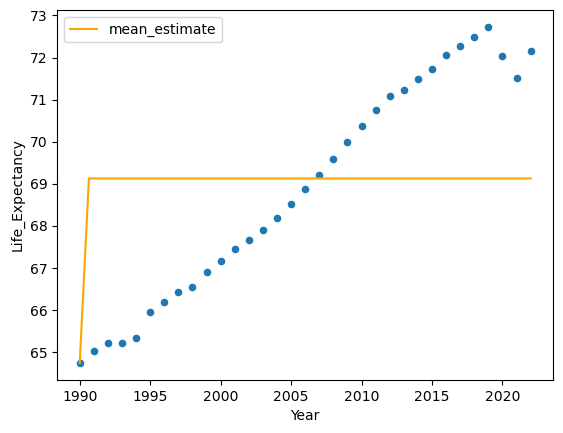

In [38]:
fig, ax = plt.subplots()
av_le_per_year.plot(kind = 'scatter', x='Year', y = 'Life_Expectancy', ax=ax)
pred_df.plot(kind = 'line', x="Year", y='mean_estimate',color='orange', ax=ax)